In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from Tools.tools import rec
from Tools.tools import collection
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from joblib import dump
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# simplement pour rendre le notebook plus présentable
import warnings
warnings.filterwarnings("ignore")

In [2]:
# collection()

#### 1. Importer votre DataSet

In [64]:
df = pd.read_csv('./Dataset/'+os.listdir('./Dataset/')[0])

<AxesSubplot:>

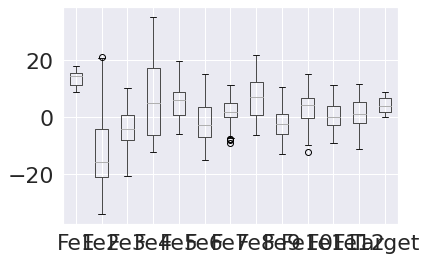

In [65]:
# Répartition des données : 
# quelques canaux de fréquences présentent des outliers ; 
# sinon, la distrubution des données semble assez homogène et cohérente
df.boxplot()

In [66]:
df.head(5)

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,14.274666,0.306604,-6.509358,25.684822,6.009788,8.236848,-4.603504,7.190116,-8.385201,8.234614,1.610211,0.485977,0.0
1,14.075767,-4.393329,-6.786652,15.713791,6.494777,8.307470,-0.646492,18.590163,-6.765775,10.011137,0.032082,1.595067,1.0
2,13.385394,-2.412716,-4.905458,18.909799,10.608101,11.484525,0.222476,10.676471,-9.668632,5.637295,-5.071390,0.665733,2.0
3,14.335635,-3.923458,-8.288954,21.251131,4.331520,2.935059,-5.941685,12.855108,-1.215089,11.138346,1.452981,1.936708,3.0
4,12.976791,-7.668485,-9.849166,13.470379,3.166024,7.288091,0.330541,18.057565,-6.420736,5.402359,-5.311179,6.554399,4.0


In [67]:
# selon quelles données on veut sélectionner
df = df.iloc[:240,:]

#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     240 non-null    float64
 1   Fe2     240 non-null    float64
 2   Fe3     240 non-null    float64
 3   Fe4     240 non-null    float64
 4   Fe5     240 non-null    float64
 5   Fe6     240 non-null    float64
 6   Fe7     240 non-null    float64
 7   Fe8     240 non-null    float64
 8   Fe9     240 non-null    float64
 9   Fe10    240 non-null    float64
 10  Fe11    240 non-null    float64
 11  Fe12    240 non-null    float64
 12  Target  240 non-null    float64
dtypes: float64(13)
memory usage: 24.5 KB


In [69]:
df.describe()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,13.683535,-8.878366,-4.335138,10.948307,5.447640,1.787946,1.501622,8.944707,-3.691344,3.724075,-1.714219,2.597333,4.500000
std,2.022207,6.850747,5.326926,11.513045,4.910310,7.317164,3.909253,6.069436,4.418470,5.220073,3.354142,4.864075,2.878284
min,8.842483,-25.436624,-20.527578,-12.011691,-5.674680,-14.815182,-8.961207,-2.963330,-12.693762,-12.088923,-9.045685,-7.384700,0.000000
25%,12.546998,-13.869839,-8.135140,5.030797,2.111081,-3.702227,-1.171787,3.187526,-7.105619,1.316984,-3.978948,-2.257805,2.000000
50%,14.286857,-8.529057,-4.528609,14.870082,5.445509,3.548352,1.302102,9.875965,-3.574004,4.907490,-2.015357,3.206734,4.500000
75%,15.074981,-3.298852,-0.234071,18.117316,8.509464,7.555845,4.534564,14.065763,-0.315647,7.076912,0.417736,6.795034,7.000000
max,17.601392,4.205647,8.269975,35.322183,19.739664,15.076510,9.627911,21.738983,8.152678,15.096898,10.107870,11.608511,9.000000


### Test de corrélation : sélection des variables les plus corrélées dans un DF X1

In [70]:
df.corrwith(df['Target'], method='pearson').abs().sort_values(ascending=False)

# X1 = df.drop(['Fe8', 'Fe11', 'Fe5', 'Fe4', 'Fe10', 'Fe9', 'Fe12', 'Target'], axis=1)

Target    1.000000
Fe3       0.348380
Fe7       0.266249
Fe12      0.202283
Fe10      0.187193
Fe1       0.169734
Fe11      0.156335
Fe2       0.156239
Fe6       0.127618
Fe9       0.124911
Fe5       0.107799
Fe4       0.072400
Fe8       0.026859
dtype: float64

### Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [71]:
y = df['Target']
y = y.astype(int)
X = df.iloc[:,:-1]

#### 4. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [73]:
# vérification de la répartition des valeurs pour la cible (train)
y_train.value_counts()

8    22
6    22
1    21
9    20
5    20
7    19
2    19
4    17
3    16
0    16
Name: Target, dtype: int64

In [74]:
# vérification de la répartition des valeurs pour la cible (test)
y_test.value_counts()

3    8
0    8
4    7
7    5
2    5
9    4
5    4
1    3
8    2
6    2
Name: Target, dtype: int64

In [75]:
# vérification du nombre de données
X_train.shape

(192, 12)

## 6. Développer votre meilleur modèle de classification

In [76]:
resultats = dict()

### DecisionTreeClassifier

meilleur score (train) : 1.0
meilleur score (test) : 0.6458333333333334
meilleurs paramètres : {'decisiontreeclassifier__criterion': 'entropy', 'neighborhoodcomponentsanalysis__n_components': 9, 'selectkbest__k': 8}


<AxesSubplot:>

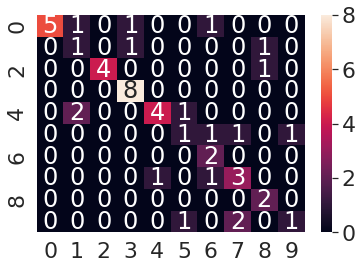

In [77]:
# créer le pipeline
pipe1 = make_pipeline(NeighborhoodComponentsAnalysis(), 
                      SelectKBest(),
                      DecisionTreeClassifier())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'decisiontreeclassifier__criterion' : ['gini', 'entropy'],
    'selectkbest__k' : [8,9,10],
    'neighborhoodcomponentsanalysis__n_components' : [ x for x in range(6, 12)]
}



# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=2, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)


# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['Decision Tree'] = [strain, stest]

print(f'meilleur score (train) : {strain}')
print(f'meilleur score (test) : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### RandomForestClassifier

meilleur score : 1.0
meilleur score : 0.7083333333333334
meilleurs paramètres : {'neighborhoodcomponentsanalysis__n_components': 7, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 300}


<AxesSubplot:>

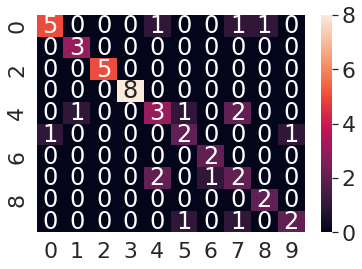

In [78]:
# créer le pipeline
pipe1 = make_pipeline(NeighborhoodComponentsAnalysis(), 
                      RandomForestClassifier())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'randomforestclassifier__n_estimators' : [100, 200, 300],
    'randomforestclassifier__bootstrap' : [False, True],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'neighborhoodcomponentsanalysis__n_components' : [ x for x in range(2, 12)]
}




# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=3, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['Random Forest'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### MLPClassifier

meilleur score : 1.0
meilleur score : 0.75
meilleurs paramètres : {'mlpclassifier__learning_rate_init': 0.005, 'mlpclassifier__max_iter': 5000, 'mlpclassifier__random_state': 50, 'mlpclassifier__warm_start': False, 'neighborhoodcomponentsanalysis__n_components': 10}


['mlp.joblib']

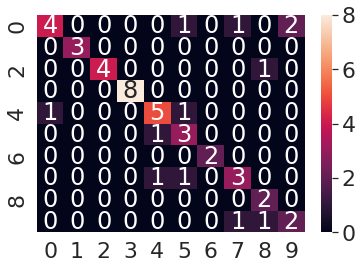

In [82]:
pipe1 = make_pipeline(StandardScaler(),
                      NeighborhoodComponentsAnalysis(), 
#                       SelectKBest(),
                      MLPClassifier())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'mlpclassifier__max_iter' : [5000, 10000],
    'mlpclassifier__learning_rate_init' : [0.005, 0.007, 0.002],
    'mlpclassifier__warm_start' : [False, True],
    'mlpclassifier__random_state' : [50],
#     'selectkbest__k' : [8,9,10],
    'neighborhoodcomponentsanalysis__n_components' : [10]
}


# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['MLP classifier'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

dump(mod, 'mlp.joblib')

### KNeighborsClassifier

meilleur score : 1.0
meilleur score : 0.6041666666666666
meilleurs paramètres : {'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance', 'selectkbest__k': 10}


['knn.joblib']

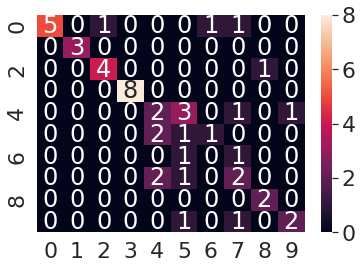

In [94]:
pipe1 = make_pipeline(StandardScaler(),SelectKBest(),
                      KNeighborsClassifier())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'kneighborsclassifier__n_neighbors' : [x for x in range(1, 20)],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['brute', 'kd_tree', 'ball_tree'],
    'kneighborsclassifier__metric' : ['minkowski', 'manhattan', 'euclidean'], 
    'selectkbest__k' : [8,9,10],
#     'neighborhoodcomponentsanalysis__n_components' : [ x for x in range(6, 12)]
}



# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['KNN'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
dump(mod, 'knn.joblib')

### XGBClassifier

meilleur score : 0.8177083333333334
meilleur score : 0.7291666666666666
meilleurs paramètres : {'neighborhoodcomponentsanalysis__n_components': 10, 'selectkbest__k': 10, 'xgbclassifier__booster': 'gblinear'}


['xgb.joblib']

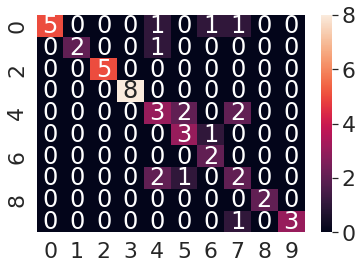

In [86]:
pipe1 = make_pipeline(NeighborhoodComponentsAnalysis(), 
                      SelectKBest(),
                      XGBClassifier())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'xgbclassifier__booster' : ['gbtree', 'gblinear','dart'], 
    'selectkbest__k' : [8,9,10],
    'neighborhoodcomponentsanalysis__n_components' : [ x for x in range(6, 12)]
}


# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['XGB classifier'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
dump(mod, 'xgb.joblib')

### SVM

meilleur score : 0.921875
meilleur score : 0.8125
meilleurs paramètres : {'neighborhoodcomponentsanalysis__n_components': 11, 'selectkbest__k': 10, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 100}


['svm.joblib']

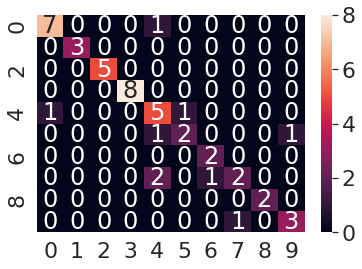

In [91]:
pipe1 = make_pipeline(NeighborhoodComponentsAnalysis(), 
                      SelectKBest(),
                      SVC())


# dictionnaires de paramètres pour l'estimateur
parametres = {
    'svc__kernel' : ['rbf', 'poly','sigmoid' ],
    'svc__gamma' : ['auto', 'scale'],
    'svc__max_iter' : [20, 100],
    'svc__C' : [0.01, 0.1, 1, 10 ],
    'selectkbest__k' : [8,9,10],
    'neighborhoodcomponentsanalysis__n_components' : [ 11]
}



# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['SVC'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
dump(mod, 'svm.joblib')

In [95]:
resultats
for i,j in resultats.items():
    print(i)
    print(f'--Résultat du Train : {j[0]}')
    print(f'--Résultat du Test : {j[1]}')
    
    
    

Decision Tree
--Résultat du Train : 1.0
--Résultat du Test : 0.6458333333333334
Random Forest
--Résultat du Train : 1.0
--Résultat du Test : 0.7083333333333334
MLP classifier
--Résultat du Train : 1.0
--Résultat du Test : 0.75
XGB classifier
--Résultat du Train : 0.8177083333333334
--Résultat du Test : 0.7291666666666666
SVC
--Résultat du Train : 0.921875
--Résultat du Test : 0.8125
KNN
--Résultat du Train : 1.0
--Résultat du Test : 0.6041666666666666


# Essai dans un programme

In [12]:
# Instanciation de l'objet de standardisation
scaler = StandardScaler().fit(X)
X_fit = scaler.transform(X)

# Création du modèle :
clf = MLPClassifier(learning_rate_init=0.002, max_iter=5000, random_state=50, warm_start= False )
clf.fit(X, y)

MLPClassifier(learning_rate_init=0.002, max_iter=5000, random_state=50)

In [11]:
# learning_rate_init=0.005,max_iter=5000,random_state=50,warm_start=False}
scaler = StandardScaler().fit(X)
X_fit = scaler.transform(X)
mlp = MLPClassifier(learning_rate_init=0.005, max_iter=5000, random_state=50, warm_start= False )
mlp.fit(X, y)


MLPClassifier(learning_rate_init=0.005, max_iter=5000, random_state=50)

In [25]:
import sounddevice as sd #sinon pip install sounddevice
import time #sinon pip install python-time
import scipy.io.wavfile as wav
from python_speech_features import mfcc #sinon pip install python_speech_features==0.4
import wave
import os

def rec(scaler, classifier, method):

    print("Attention, l'enregistrement commence dans :")
    
    for i in range(0,2):
        time.sleep(1)
        print(1-i)
    
    time.sleep(1)
    
    rate = 48000
    duration = 1
           
    

    print("Prononcer votre Digit : ")
    data = sd.rec(int(duration * rate), samplerate=rate, channels=1)
    sd.wait()
    time.sleep(1)    
    data = data / data.max() * np.iinfo(np.int16).max
    data = data.astype(np.int16)
    
    mfcc_feat = np.mean(mfcc(data,rate, numcep=12), axis=0)   
    mfcc_feat = np.expand_dims(mfcc_feat, axis=0)
    df = pd.DataFrame(mfcc_feat)
    

    if method=='pearson':
        df = pd.DataFrame(mfcc_feat, columns=['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12'])
        df = df.drop(['Fe8', 'Fe11', 'Fe5', 'Fe4', 'Fe10', 'Fe9', 'Fe12'], axis=1)
        mfcc_feat = np.array(df)
        
    if method=='chi2':
        df = pd.DataFrame(mfcc_feat, columns=['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12'])
        df = df.drop(['Fe1', 'Fe4', 'Fe6', 'Fe8', 'Fe9', 'Fe11', 'Fe12'], axis=1)
        mfcc_feat = np.array(df)

    
        
      
    
    pred = classifier.predict(scaler.transform(mfcc_feat))
    
    
    
    print('------------------')
    print('Digit : ', pred[0])
    print('------------------')


rec(scaler, mlp, 'none')

Attention, l'enregistrement commence dans :
1
0
Prononcer votre Digit : 
------------------
Digit :  4
------------------
